<h1><center style='color:#7D7CF9'>Table of Contents<a class ='anchor' id='a'></a></h1>

* [Packages Used](#b)
* [Data](#c)
* [EDA](#d)
* [Data Visualization](#e)
 * [Total Confirmed](#f)
 * [Total Recovered](#g)
 * [Total Deceased](#h)
 * [Total Tested](#i)
   * **[State-Wise Trends](#j)**
    * [Andaman and Nicobar Islands](#1) 
    * [Andhra Pradesh](#2)
    * [Arunachal Pradesh](#3)
    * [Assam](#4)
    * [Bihar](#5)
    * [Chandigarh](#6)
    * [Chhattisgarh](#7)
    * [Dadra and Nagar Haveli and Daman and Diu](#8)
    * [Delhi](#9)
    * [Goa](#10)
    * [Gujarat](#11)
    * [Haryana](#12)
    * [Himachal Pradesh](#13)
    * [Jammu and Kashmir](#14)
    * [Jharkhand](#15)
    * [Karnataka](#16)
    * [Kerala](#17)
    * [Ladakh](#18)
    * [Lakshadweep](#19)
    * [Madhya Pradesh](#20)
    * [Maharashtra](#21)
    * [Manipur](#22)
    * [Meghalaya](#23)
    * [Mizoram](#24)
    * [Nagaland](#25)
    * [Odisha](#26)
    * [Puducherry](#27)
    * [Punjab](#28)
    * [Rajasthan](#29)
    * [Sikkim](#30)
    * [Tamil Nadu](#31)
    * [Telangana](#32)
    * [Tripura](#33)
    * [Uttar Pradesh](#34)
    * [Uttarakhand](#35)
    * [West Bengal](#36)
* [Cumulative Cases of each State](#k)   

<h2><center style='color:#7D7CF9'>Loading Packages</h2><a class='anchor' id='b'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import date
from datetime import timedelta
import datetime 
from datetime import datetime
today = datetime.now()

import os
if not os.path.exists('STATE_'+ today.strftime('%d-%m-%Y')):
    os.mkdir('E:/Data Science Datasets/Covid_19_Master/Local/' +'STATE_'+ today.strftime('%d-%m-%Y'))
    
%matplotlib inline

In [2]:
today = date.today()
y_day = today - timedelta(days = 1)

In [3]:
to_day = y_day.strftime('%Y-%m-%d')

<h2><center style='color:#7D7CF9'>Loading Data</h2><a class='anchor' id='c'></a>

In [4]:
state = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')

<h2><center style='color:#7D7CF9'>Exploratory Data Analysis</h2><a class='anchor' id='d'></a>

In [5]:
#Selecting & Dropping Unwanted rows

ind_index = state[state['State'] == 'India'].index
un_index = state[state['State'] == 'State Unassigned'].index

state.drop(un_index, axis = 0, inplace = True)
state.drop(ind_index, axis = 0, inplace = True)

In [6]:
tday = state[state['Date'] ==to_day]

In [7]:
state['Tested'].fillna(0.0, inplace = True)
state['Tested'] = state['Tested'].astype('int64')

In [8]:
state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15063 entries, 0 to 15578
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       15063 non-null  object
 1   State      15063 non-null  object
 2   Confirmed  15063 non-null  int64 
 3   Recovered  15063 non-null  int64 
 4   Deceased   15063 non-null  int64 
 5   Other      15063 non-null  int64 
 6   Tested     15063 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 941.4+ KB


In [9]:
state.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,15063,448,2021-03-05,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,15063,36,Kerala,448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Confirmed,15063.0,NaN,NaN,NaN,196233.625373,413458.604685,0.0,2937.5,27030.0,224937.5,5433506.0
Recovered,15063.0,NaN,NaN,NaN,176477.231362,368238.64021,0.0,1786.0,20226.0,210356.0,4927480.0
Deceased,15063.0,NaN,NaN,NaN,2744.956582,7224.604352,0.0,13.0,369.0,2228.0,83777.0
Other,15063.0,NaN,NaN,NaN,66.370311,310.200051,-1.0,0.0,0.0,1.0,5230.0
Tested,15063.0,NaN,NaN,NaN,3406867.003519,5930524.462327,0.0,72410.0,439258.0,4734041.0,45231090.0


<h1><center style='color:#7D7CF9'>Data Visualization</h2><a class='anchor' id='e'></a>

<b><i><h3 align="left" style='color:#38a3a5'>Total Confirmed<a class='anchor' id='f'></a>

''

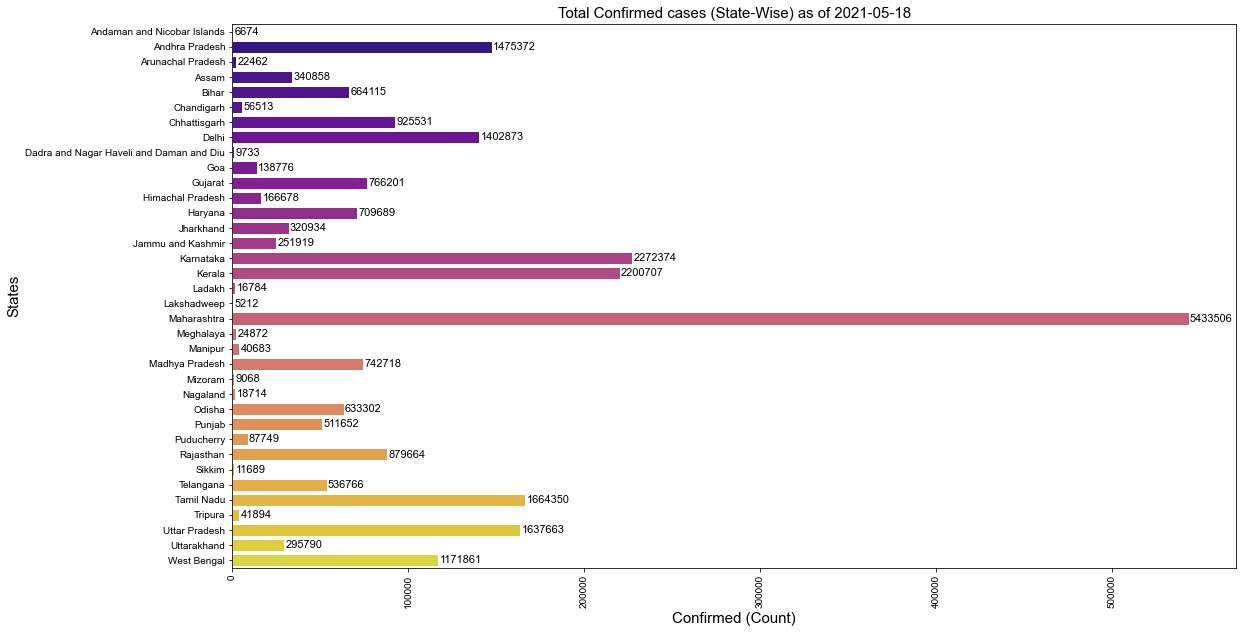

In [10]:
f, ax = plt.subplots(figsize=(18, 10))
sns.set_theme(style="darkgrid")


ax = sns.barplot( tday['Confirmed'], tday['State'],  palette = "plasma")

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+8000, i.get_y()+0.6, round(i.get_width()), fontsize=11, color='black')


#ax.set_xticklabels(tday['State'] , rotation = 'vertical')
ax.set_xticklabels((0, 100000, 200000, 300000, 400000, 500000), rotation = 'vertical')

plt.title('Total Confirmed cases (State-Wise) as of {}'.format(to_day), fontsize = 15)
plt.ylabel('States', fontsize = 15)
plt.xlabel('Confirmed (Count)', fontsize = 15)
plt.savefig(os.path.join('STATE_'+ today.strftime('%d-%m-%Y'), 'Total Confirmed {}.png'.format(today.strftime('%d-%m-%Y'))))
    
;

<b><i><h3 align="left" style='color:#38a3a5'>Total Recovered<a class='anchor' id='g'></a>

''

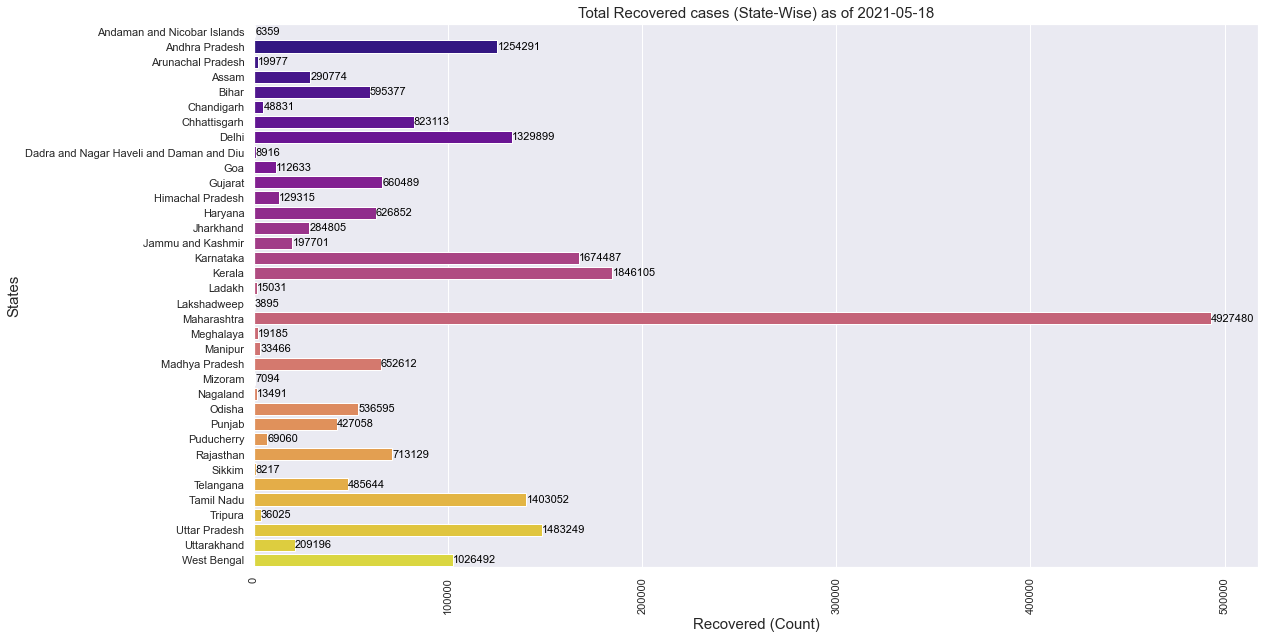

In [11]:
plt.figure(figsize = (18,10))

ax = sns.barplot(tday['Recovered'],tday['State'],  label = 'Total Recovered', palette = "plasma")

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+80, i.get_y()+0.6, round(i.get_width()), fontsize=11, color='black')


#ax.set_xticklabels(tday['State'], rotation = 'vertical')
ax.set_xticklabels((0, 100000, 200000, 300000, 400000, 500000), rotation = 'vertical')

plt.title('Total Recovered cases (State-Wise) as of {}'.format(to_day), fontsize = 15)
plt.ylabel('States', fontsize = 15)
plt.xlabel('Recovered (Count)', fontsize = 15)

plt.savefig(os.path.join('STATE_'+ today.strftime('%d-%m-%Y'), 'Total Recovered {}.png'.format(today.strftime('%d-%m-%Y'))))
    
;

<b><i><h3 align="left" style='color:#38a3a5'>Total Deceased<a class='anchor' id='h'></a>

''

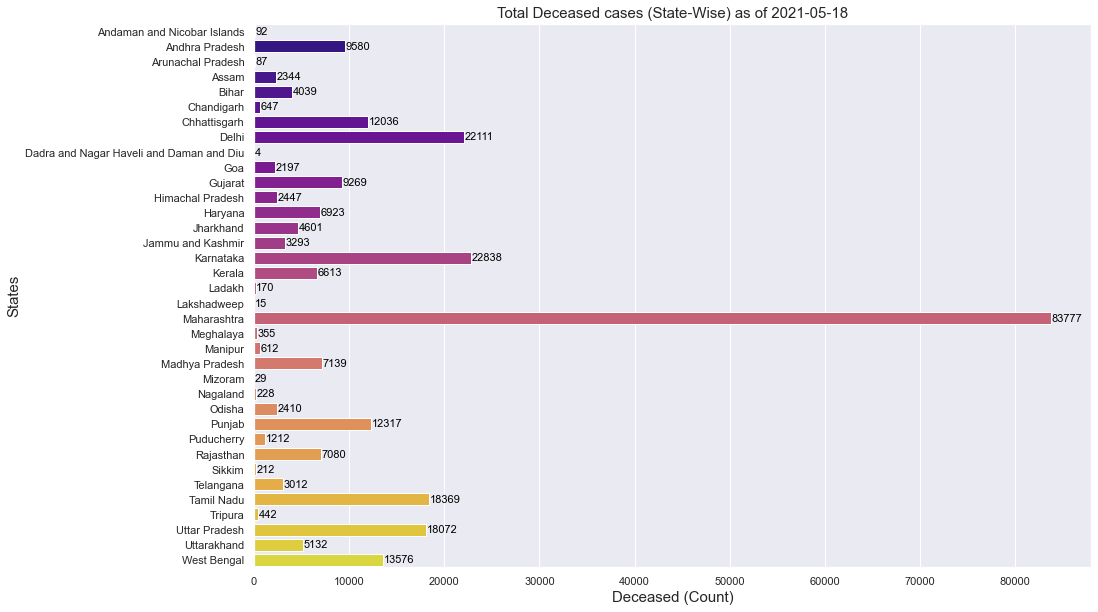

In [12]:
plt.figure(figsize = (15, 10))
sns.set_theme(style="darkgrid")


ax = sns.barplot(tday['Deceased'],  tday['State'], label = 'Total Deceased', palette = "plasma")

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+70, i.get_y()+0.6, round(i.get_width()), fontsize=11, color='black')


#ax.set_xticklabels(tday['State'] , rotation = 'vertical')

plt.title('Total Deceased cases (State-Wise) as of {}'.format(to_day), fontsize = 15)
plt.ylabel('States', fontsize = 15)
plt.xlabel('Deceased (Count)', fontsize = 15)
plt.savefig(os.path.join('STATE_'+ today.strftime('%d-%m-%Y'), 'Total Deceased {}.png'.format(today.strftime('%d-%m-%Y'))))
  
;

<b><i><h3 align="left" style='color:#38a3a5'>Total Tested<a class='anchor' id='i'></a>

''

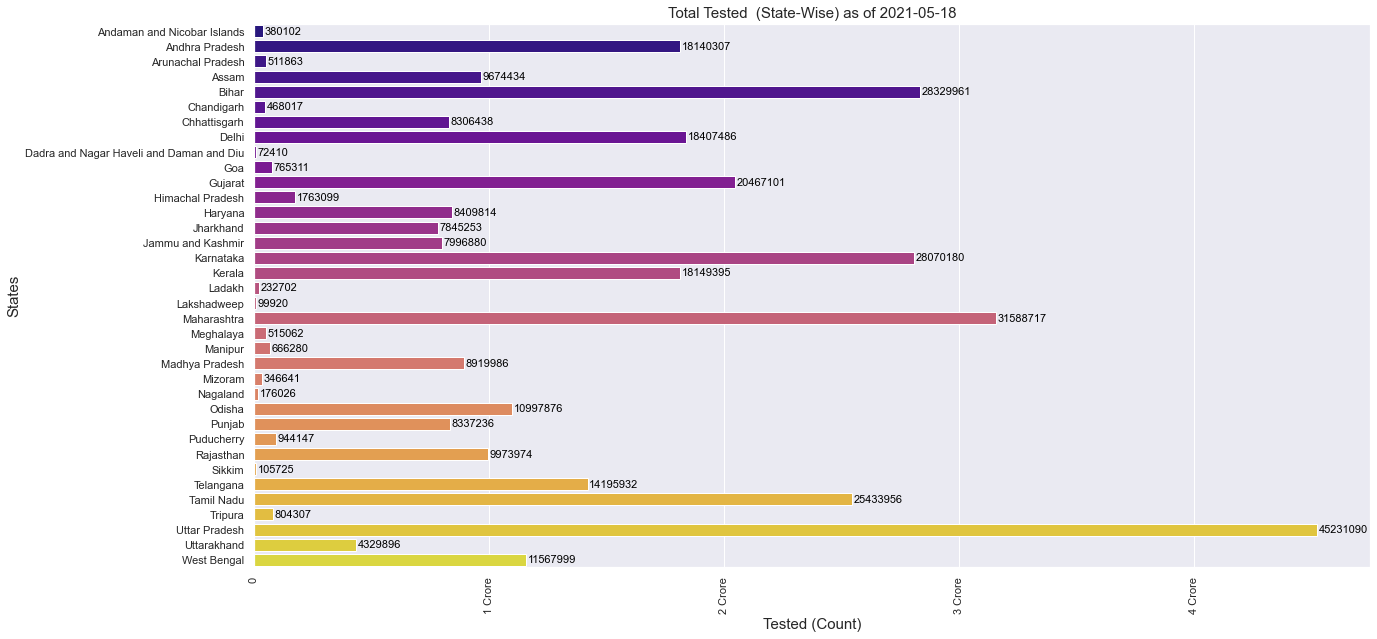

In [13]:
plt.figure(figsize = (20, 10))
sns.set_theme(style="darkgrid")


ax = sns.barplot(tday['Tested'],tday['State'], palette = "plasma")



# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+70000, i.get_y()+0.6, round(i.get_width()), fontsize=11, color='black')

#ax.set_yticklabels(tday['State'] , rotation = 'vertical')
ax.set_xticklabels((0, '1 Crore', '2 Crore', '3 Crore', '4 Crore', '5 Crore'), rotation = 'vertical')

plt.title('Total Tested  (State-Wise) as of {}'.format(to_day), fontsize = 15)
plt.ylabel('States', fontsize = 15)
plt.xlabel('Tested (Count)', fontsize = 15)
plt.savefig(os.path.join('STATE_'+ today.strftime('%d-%m-%Y'), 'Total Tested {}.png'.format(today.strftime('%d-%m-%Y'))))
  
;

<h2 align="center" style='color:#7D7CF9'>State Wise Trends<a class='anchor' id='j'></a>

In [14]:
#States of INDIA
st = ['Kerala', 'Delhi', 'Telangana', 'Rajasthan', 'Haryana','Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu and Kashmir',
       'Karnataka', 'Maharashtra', 'Punjab', 'Andhra Pradesh', 'Himachal Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry',
       'West Bengal', 'Chandigarh', 'Chhattisgarh', 'Gujarat','Madhya Pradesh', 'Bihar', 'Manipur', 'Goa', 'Mizoram',
       'Andaman and Nicobar Islands', 'Assam', 'Jharkhand','Arunachal Pradesh', 'Nagaland', 'Tripura',
       'Dadra and Nagar Haveli and Daman and Diu', 'Meghalaya', 'Sikkim','Lakshadweep']
st.sort()

In [15]:
def state_plot(df):
    '''This function will plot lineplot for each given state.
    ---The lineplot will show the following:-
    1. Total Confirmed Cases
    2. Total Recovered Cases
    3. Total Deceased Cases
    '''
    a = state[state['State'] == df]
    a['Date'] = pd.to_datetime(a['Date'], format = ('%Y-%m-%d'))
    plt.figure(figsize = (15, 10))
    sns.set_theme(style="darkgrid")
    rgb = np.random.rand(3,)
    rgb1 = np.random.rand(3,)
    rgb2 = np.random.rand(3,)

    ax = sns.lineplot( a['Date'], a['Confirmed'], label = 'Confirmed', linestyle = '--', color = rgb, linewidth = 2.5)
    ax = sns.lineplot( a['Date'], a['Recovered'], label = 'Recovered', linestyle = '-.', color = rgb1, linewidth = 2.5)
    ax = sns.lineplot( a['Date'], a['Deceased'], label = 'Deceased', linestyle = ':', color = rgb2,linewidth = 2.5)


    for value in ax.lines:
        y = value.get_ydata()
        if len(y)>0:
            ax.annotate(f'{y[-1]:.0f}',xy=(1,y[-1]), xycoords=('axes fraction','data'),ha='left',va='center',color=value.get_color())

    ax.set_xlim(a['Date'].iloc[0], a['Date'].iloc[-1])
    plt.ylabel('Counts', fontsize = 15)
    plt.xlabel('Date', fontsize = 15)
    plt.title(a['State'].iloc[0], fontsize = 15)
    plt.savefig(os.path.join('STATE_'+ today.strftime('%d-%m-%Y'), '{}.png'.format(df)))
  

;

''

<b><i><h3 align='center' style='color:#33415c'>Andaman & Nicobar Islands<a class='anchor' id='1'></a>

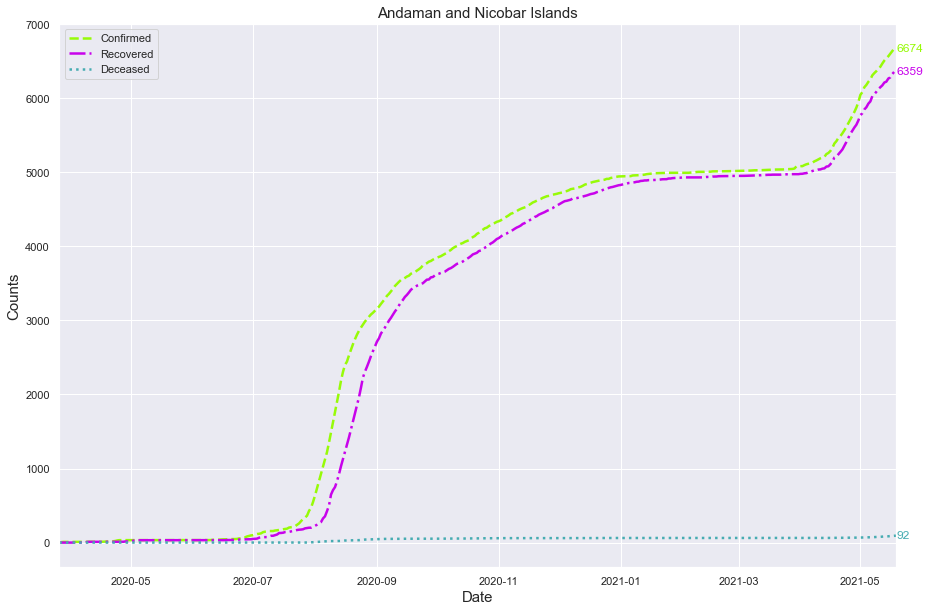

In [16]:
state_plot(st[0])

<b><i><h3 align='center' style='color:#33415c'>Andhra Pradesh<a class='anchor' id='2'></a>

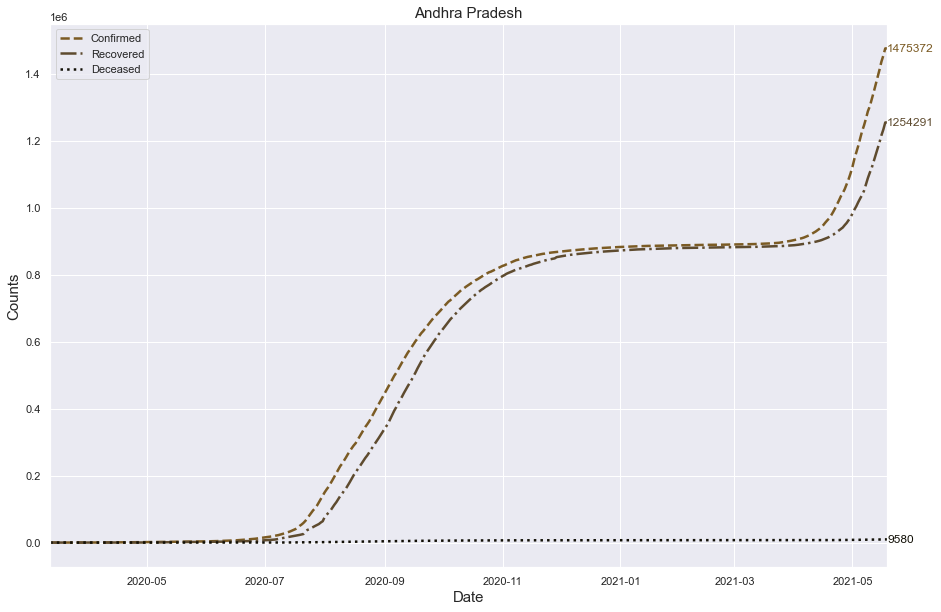

In [17]:
state_plot(st[1])

<b><i><h3 align='center' style='color:#33415c'>Arunanchal Pradesh<a class='anchor' id='3'></a>

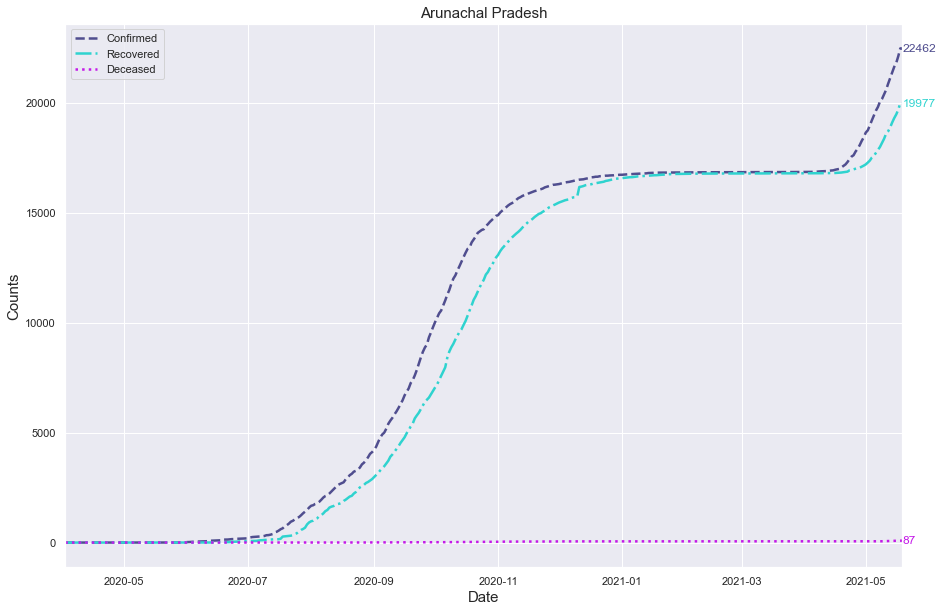

In [18]:
state_plot(st[2])

<b><i><h3 align='center' style='color:#33415c'>Assam<a class='anchor' id='4'></a>

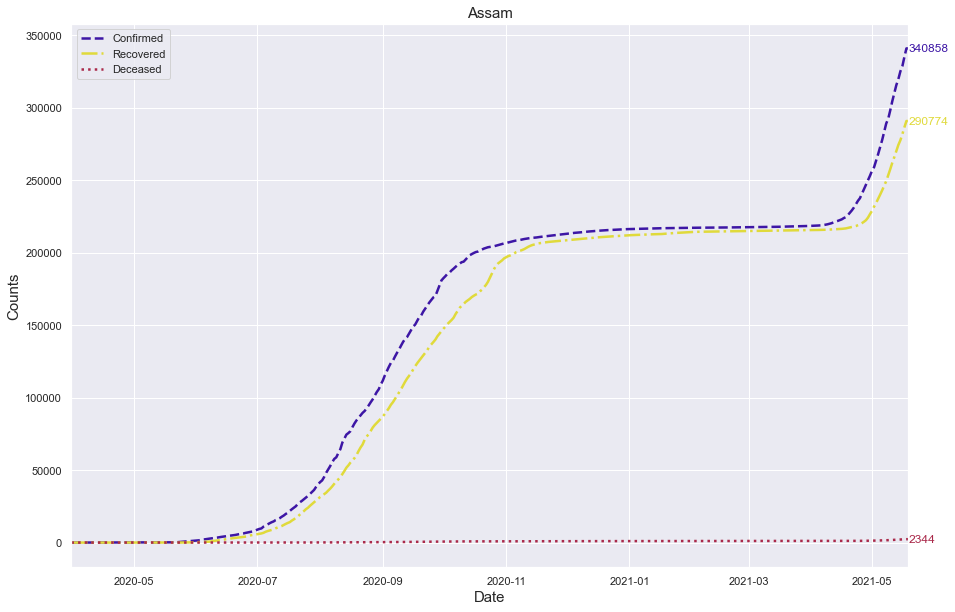

In [19]:
state_plot(st[3])

<b><i><h3 align='center' style='color:#33415c'>Bihar<a class='anchor' id='5'></a>

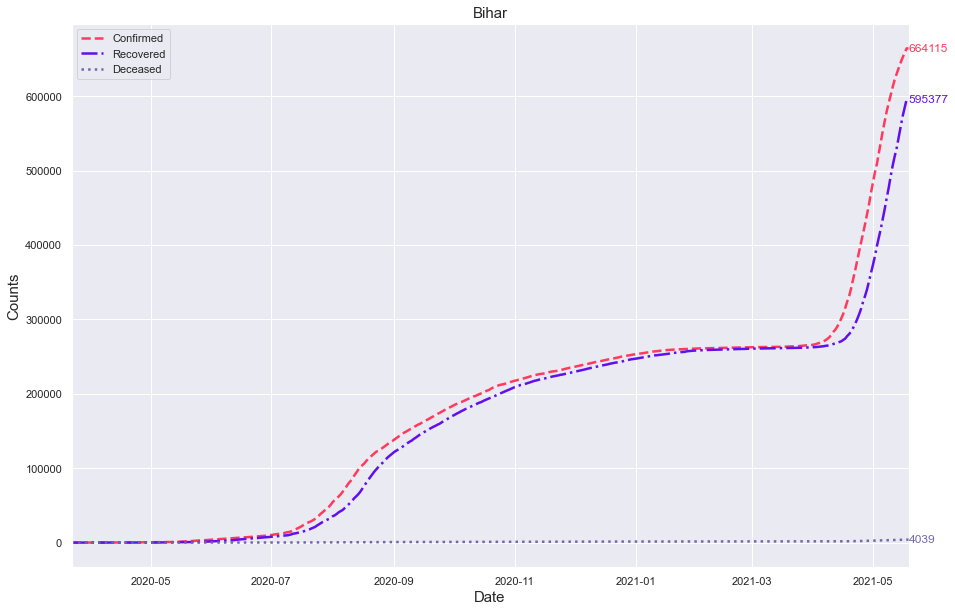

In [20]:
state_plot(st[4])

<b><i><h3 align='center' style='color:#33415c'>Chandigarh<a class='anchor' id='6'></a>

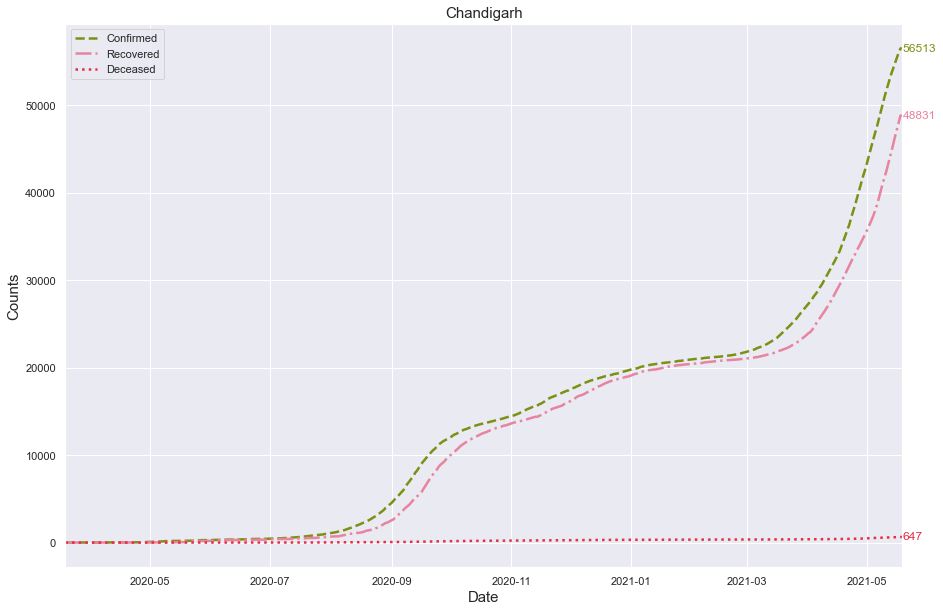

In [21]:
state_plot(st[5])

<b><i><h3 align='center' style='color:#33415c'>Chhattisgarh<a class='anchor' id='7'></a>

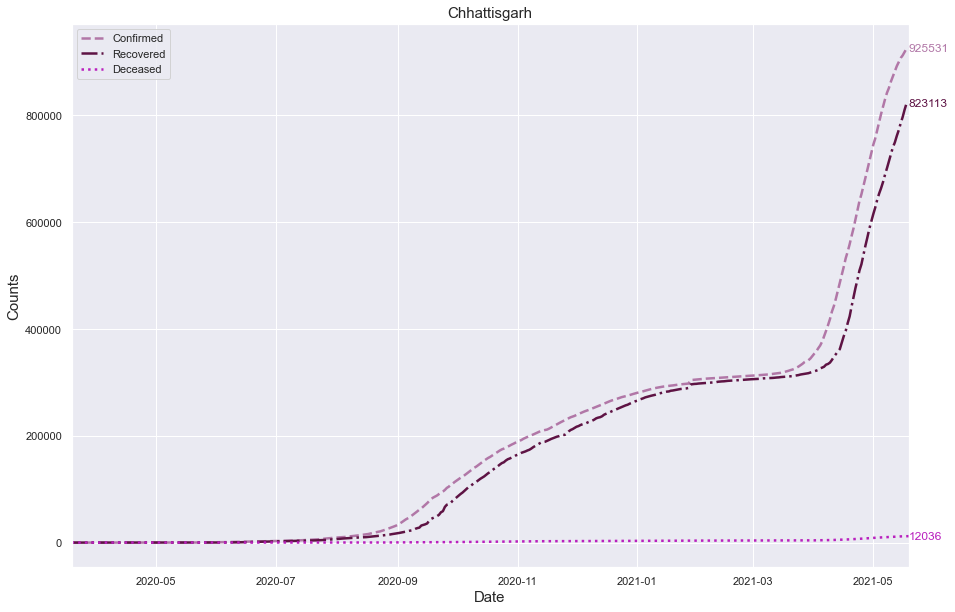

In [22]:
state_plot(st[6])

<b><i><h3 align='center' style='color:#33415c'>Dadra and Nagar Haveli and Daman Diu<a class='anchor' id='8'></a>

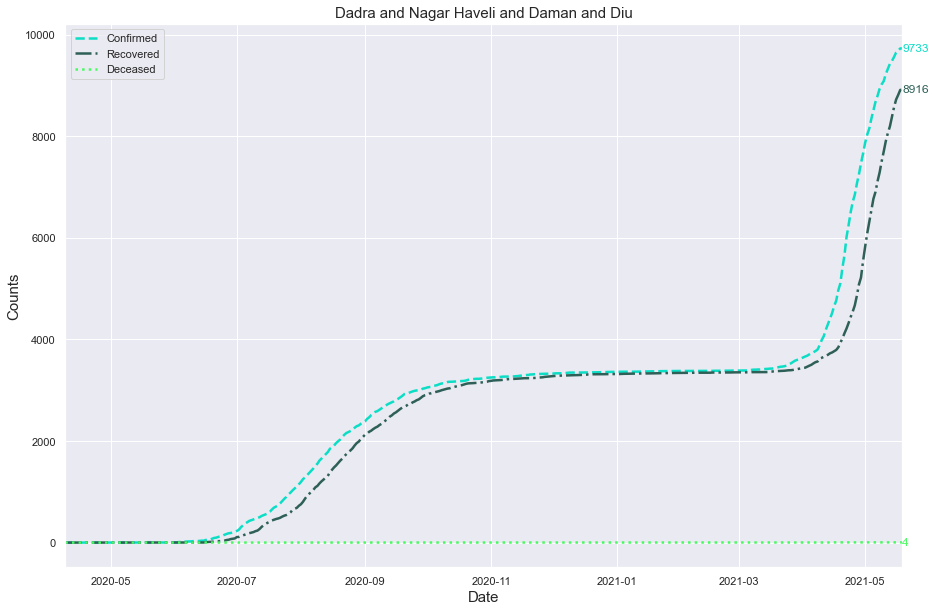

In [23]:
state_plot(st[7])

<b><i><h3 align='center' style='color:#33415c'>Delhi<a class='anchor' id='9'></a>

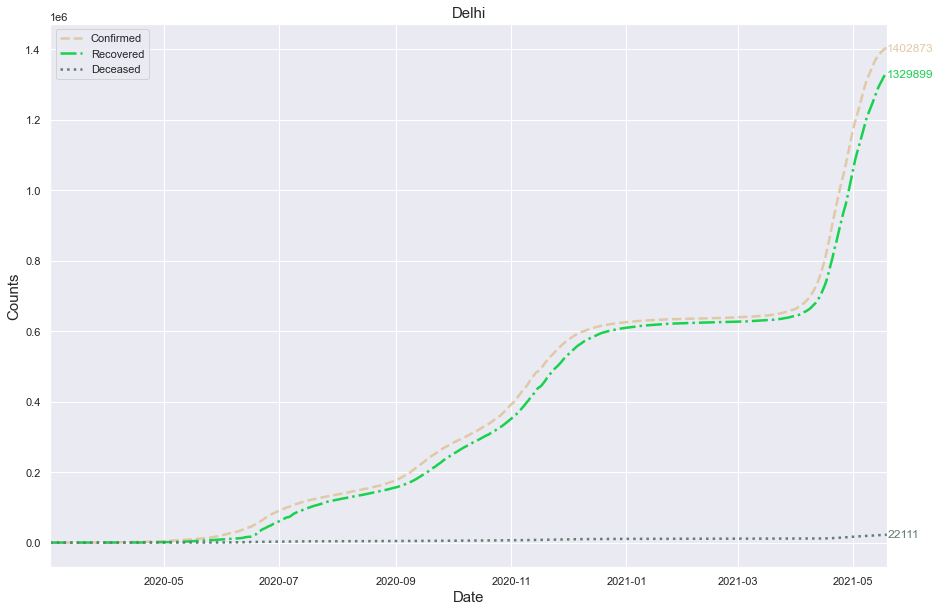

In [24]:
state_plot(st[8])

<b><i><h3 align='center' style='color:#33415c'>Goa<a class='anchor' id='10'></a>

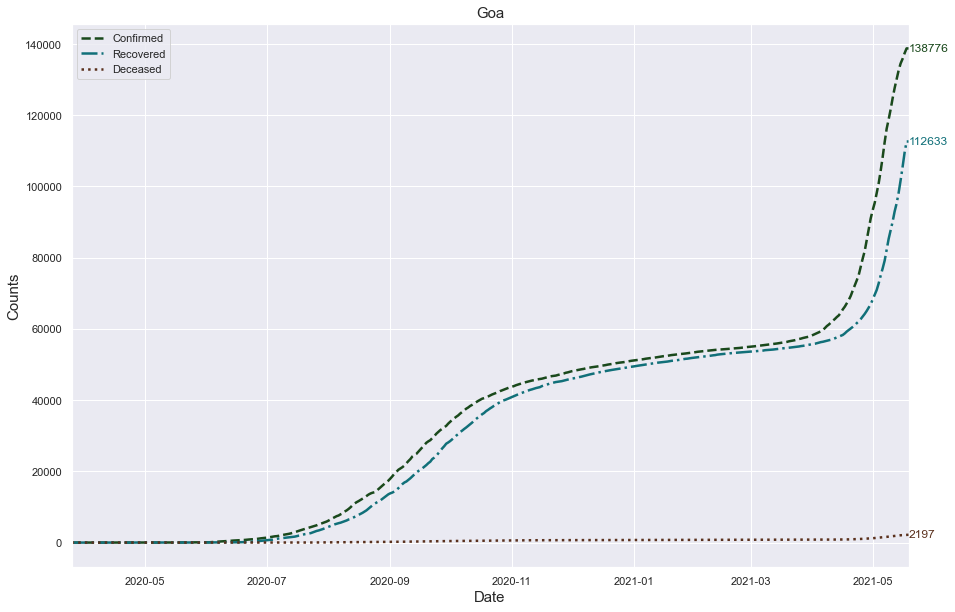

In [25]:
state_plot(st[9])

<b><i><h3 align='center' style='color:#33415c'>Gujarat<a class='anchor' id='11'></a>

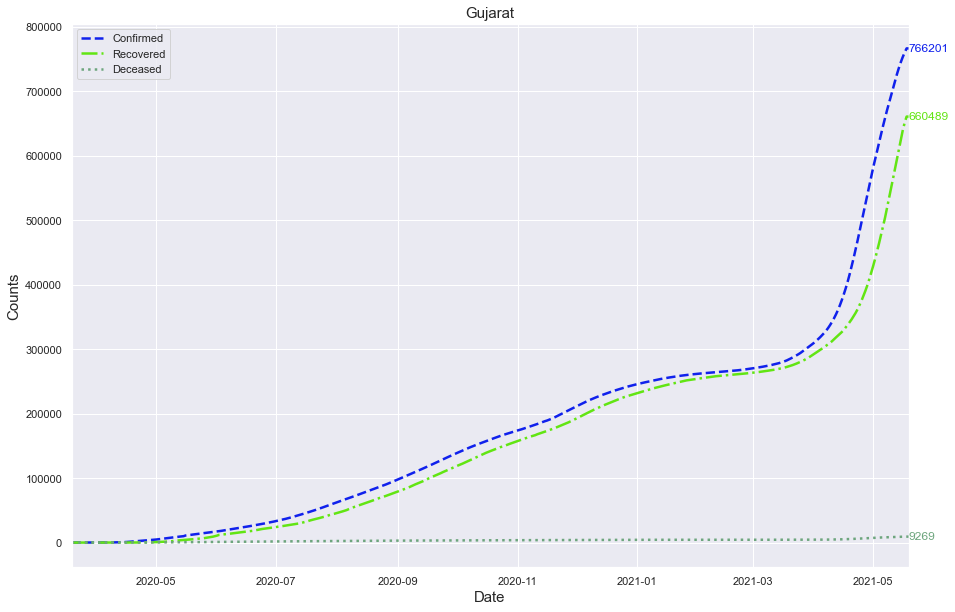

In [26]:
state_plot(st[10])

<b><i><h3 align='center' style='color:#33415c'>Haryana<a class='anchor' id='12'></a>

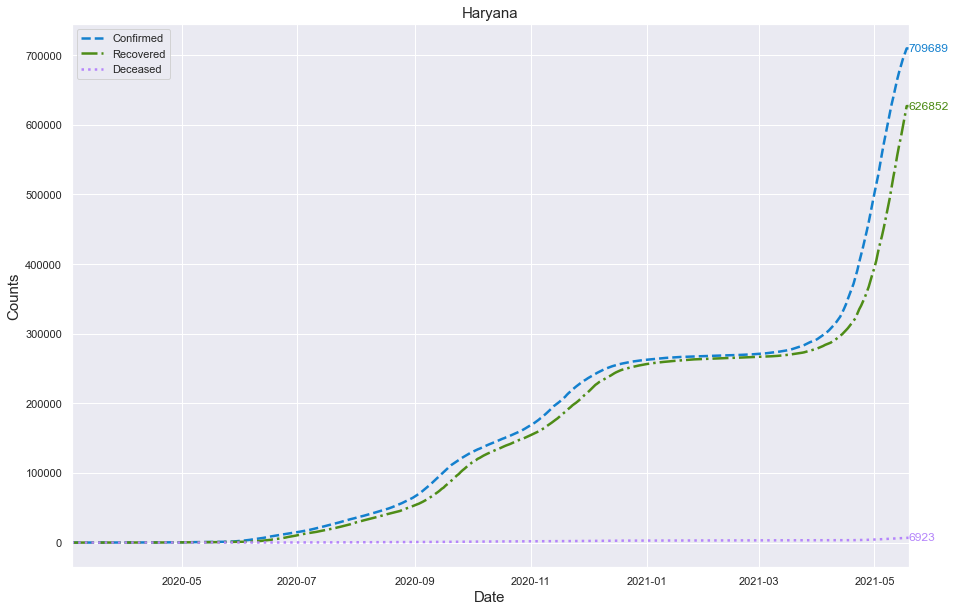

In [27]:
state_plot(st[11])

<b><i><h3 align='center' style='color:#33415c'>Himnachal Pradesh<a class='anchor' id='13'></a>

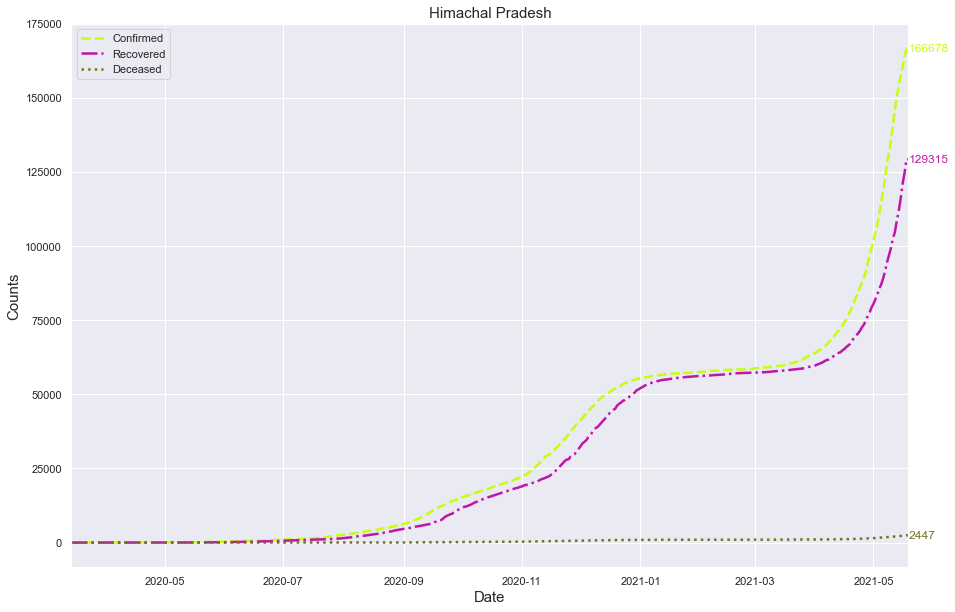

In [28]:
state_plot(st[12])

<b><i><h3 align='center' style='color:#33415c'>Jammu Kashmir<a class='anchor' id='14'></a>

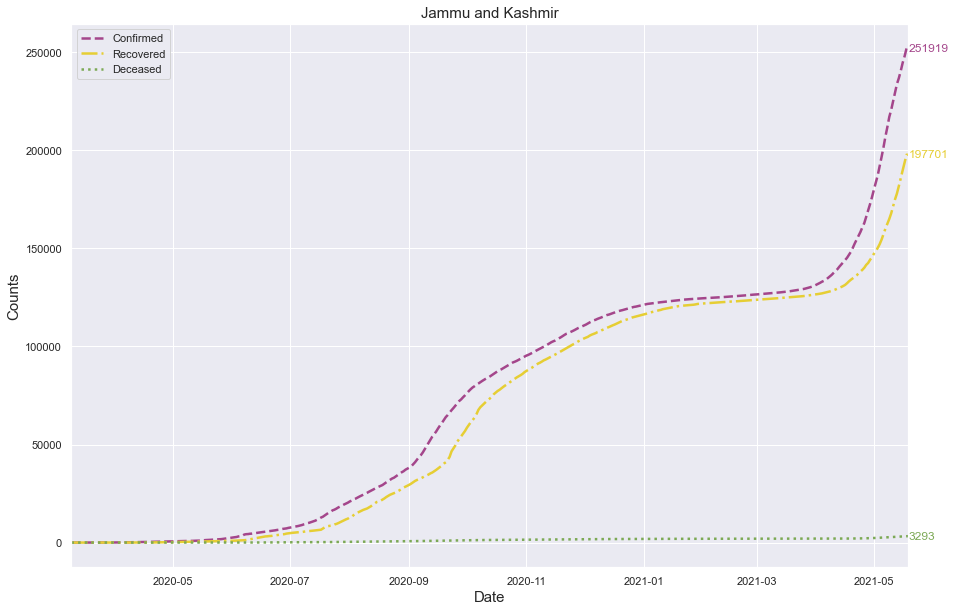

In [29]:
state_plot(st[13])

<b><i><h3 align='center' style='color:#33415c'>Jharkhand<a class='anchor' id='15'></a>

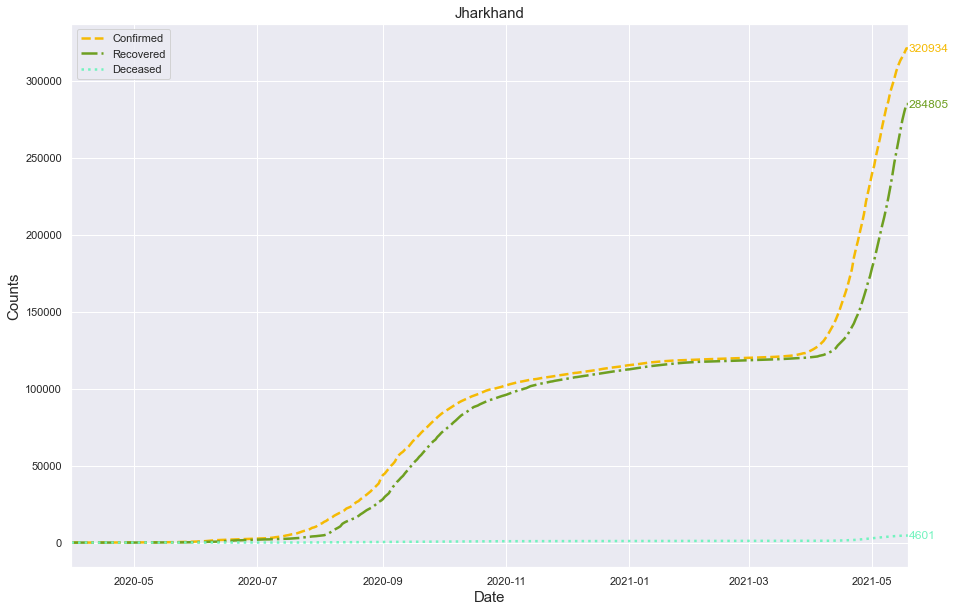

In [30]:
state_plot(st[14])

<b><i><h3 align='center' style='color:#33415c'>Karnataka<a class='anchor' id='16'></a>

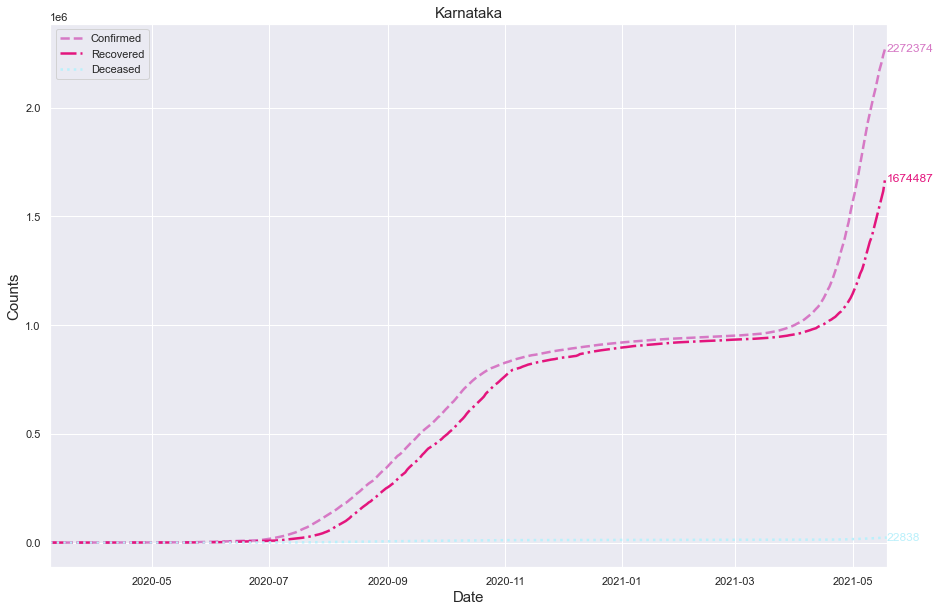

In [31]:
state_plot(st[15])

<b><i><h3 align='center' style='color:#33415c'>Kerala<a class='anchor' id='17'></a>

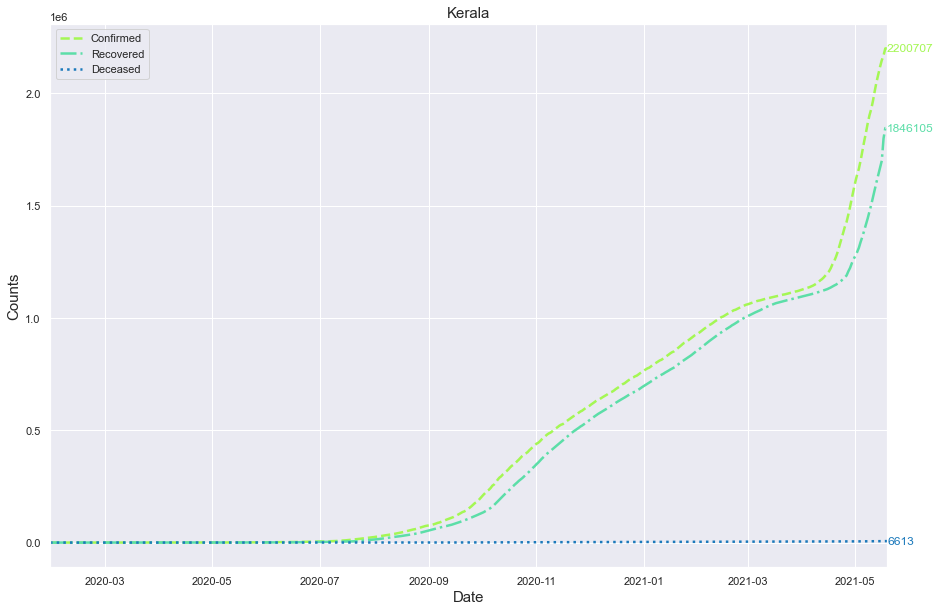

In [32]:
state_plot(st[16])

<b><i><h3 align='center' style='color:#33415c'>Ladakh<a class='anchor' id='18'></a>

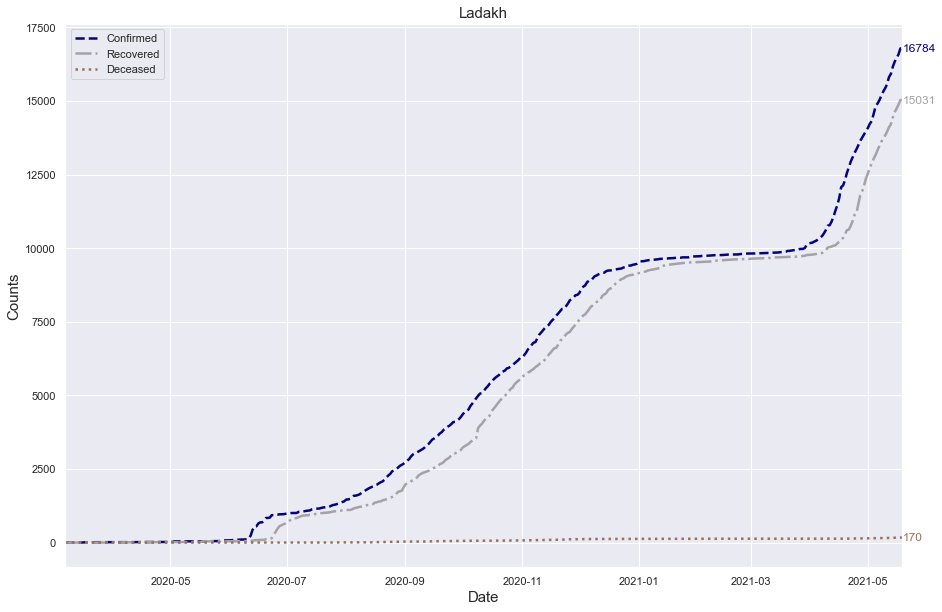

In [33]:
state_plot(st[17])

<b><i><h3 align='center' style='color:#33415c'>Lakshadweep<a class='anchor' id='19'></a>

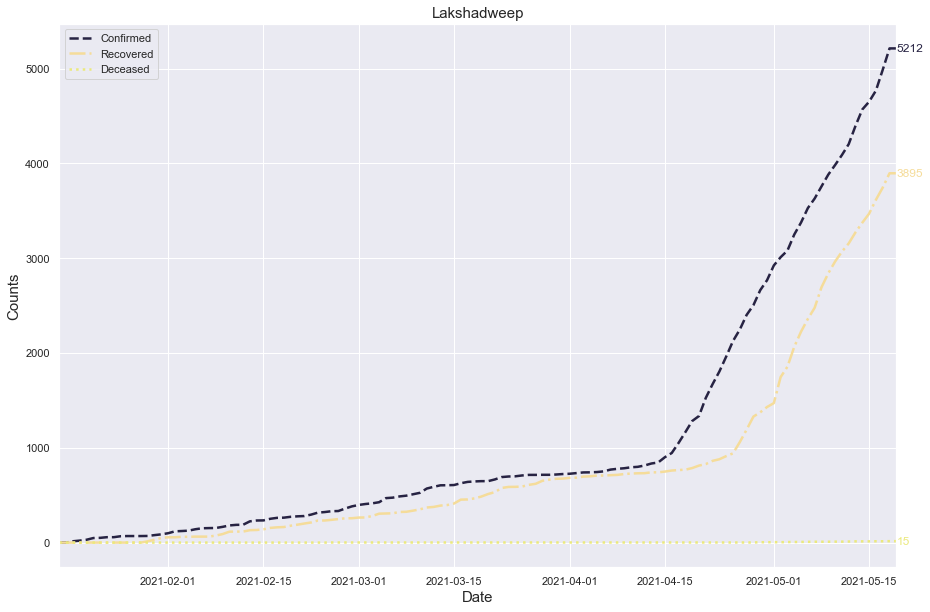

In [34]:
state_plot(st[18])

<b><i><h3 align='center' style='color:#33415c' id='20'>Madhya Pradesh</h3>

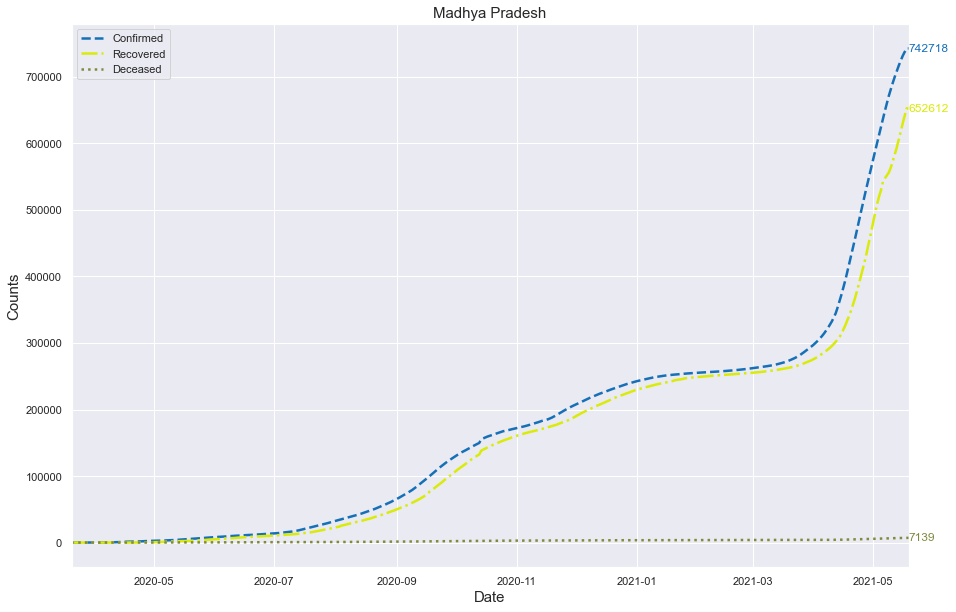

In [35]:
state_plot(st[19])

<b><i><h3 align='center' style='color:#33415c'>Maharashtra<a class='anchor' id='21'></a>

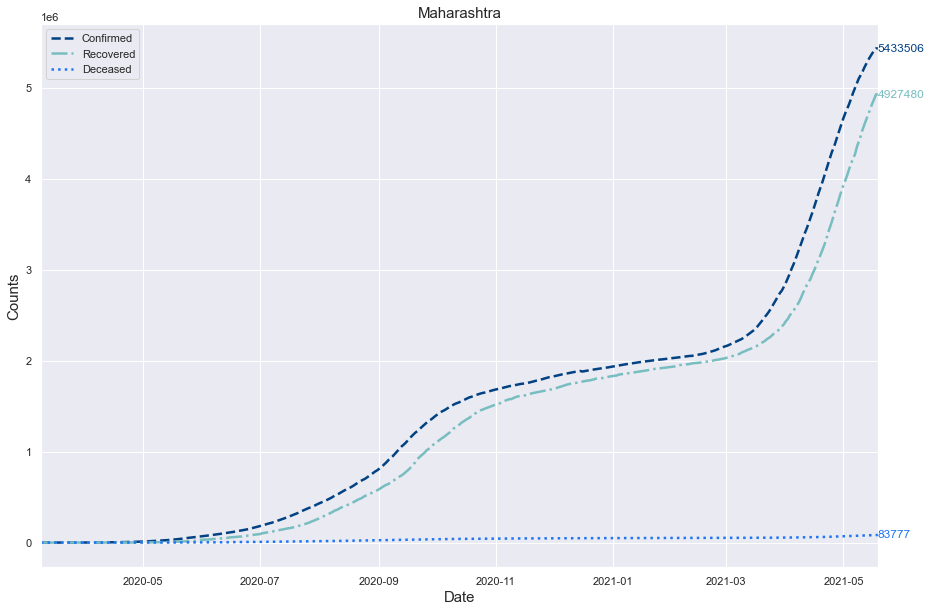

In [36]:
state_plot(st[20])

<b><i><h3 align='center' style='color:#33415c'>Manipur<a class='anchor' id='22'></a>

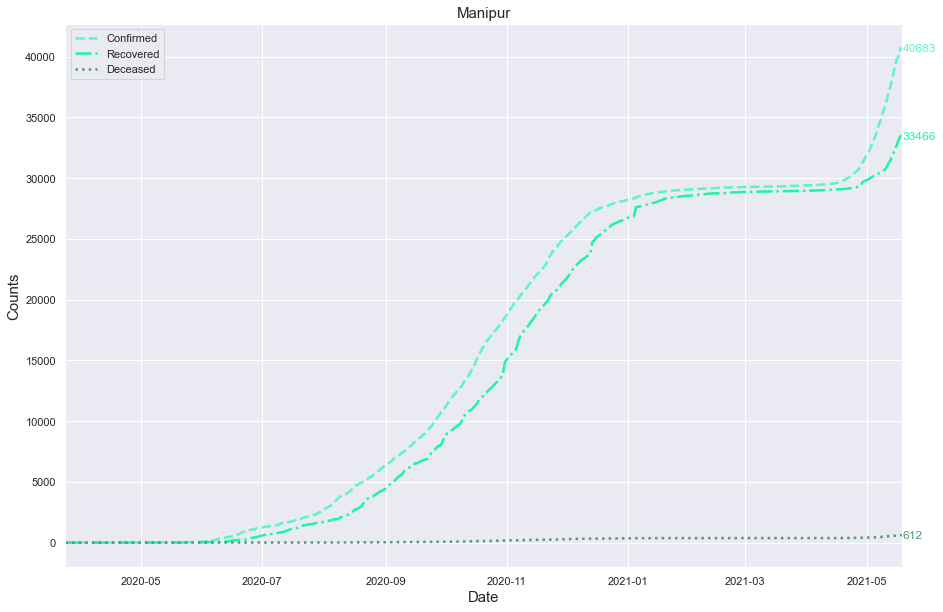

In [37]:
state_plot(st[21])

<b><i><h3 align='center' style='color:#33415c'>Meghalaya<a class='anchor' id='23'></a>

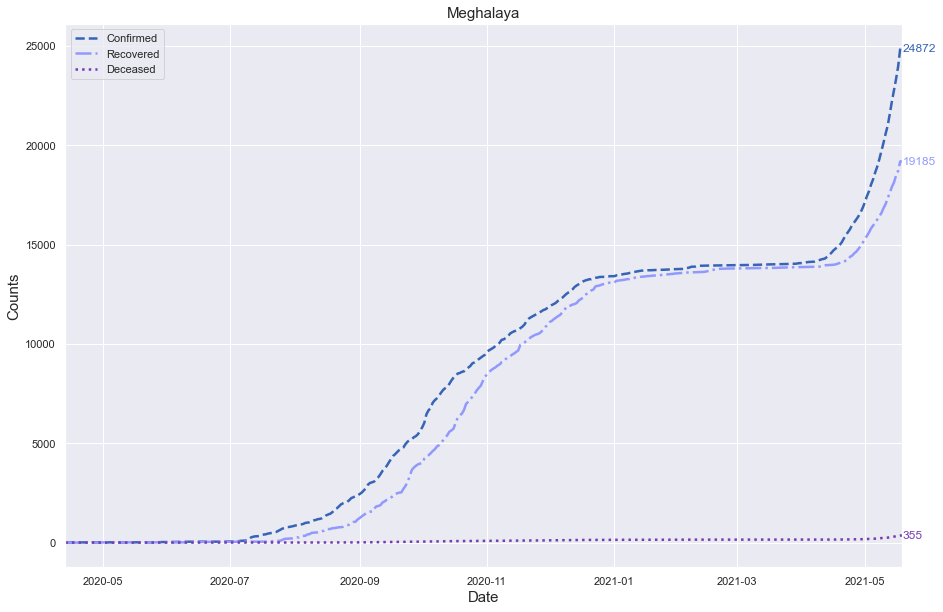

In [38]:
state_plot(st[22])

<b><i><h3 align='center' style='color:#33415c'>Mizoram<a class='anchor' id='24'></a>

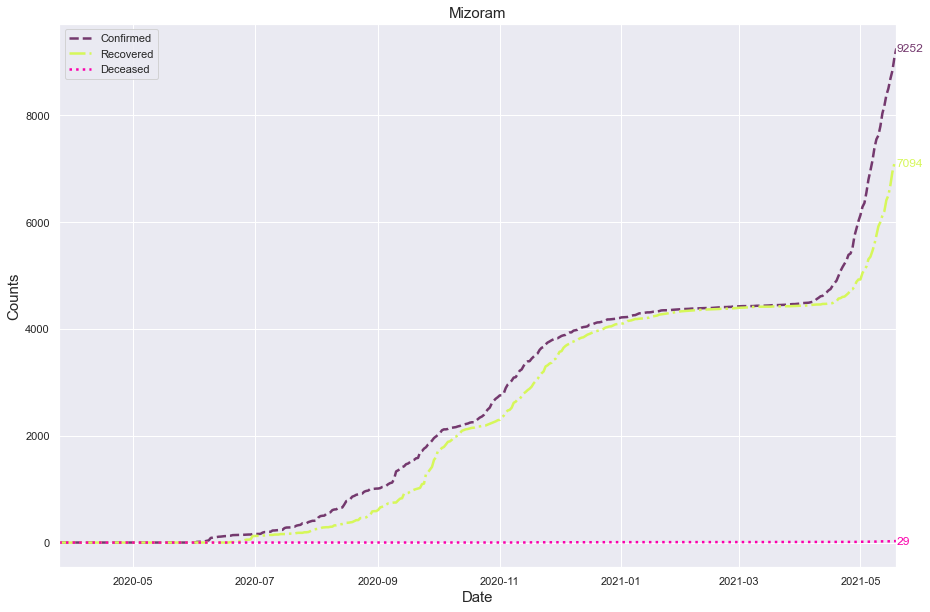

In [39]:
state_plot(st[23])

<b><i><h3 align='center' style='color:#33415c'>Nagaland<a class='anchor' id='25'></a>

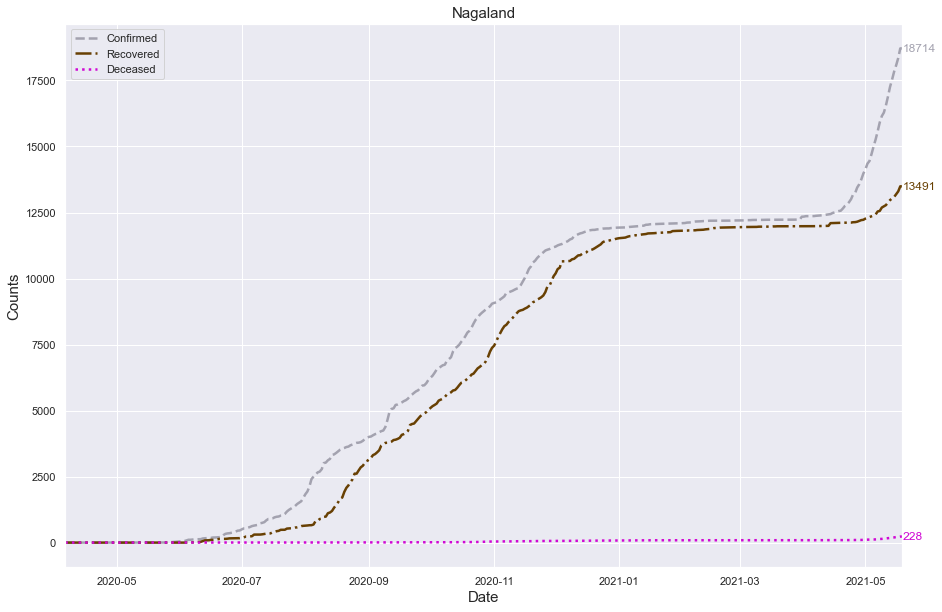

In [40]:
state_plot(st[24])

<b><i><h3 align='center' style='color:#33415c'>Odisha<a class='anchor' id='26'></a>

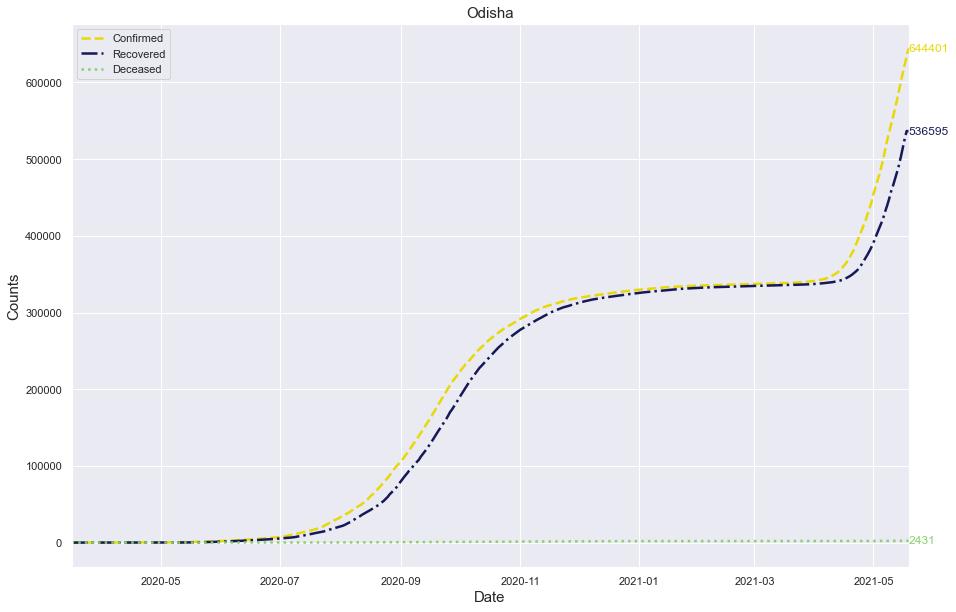

In [41]:
state_plot(st[25])

<b><i><h3 align='center' style='color:#33415c'>Puducherry<a class='anchor' id='27'></a>

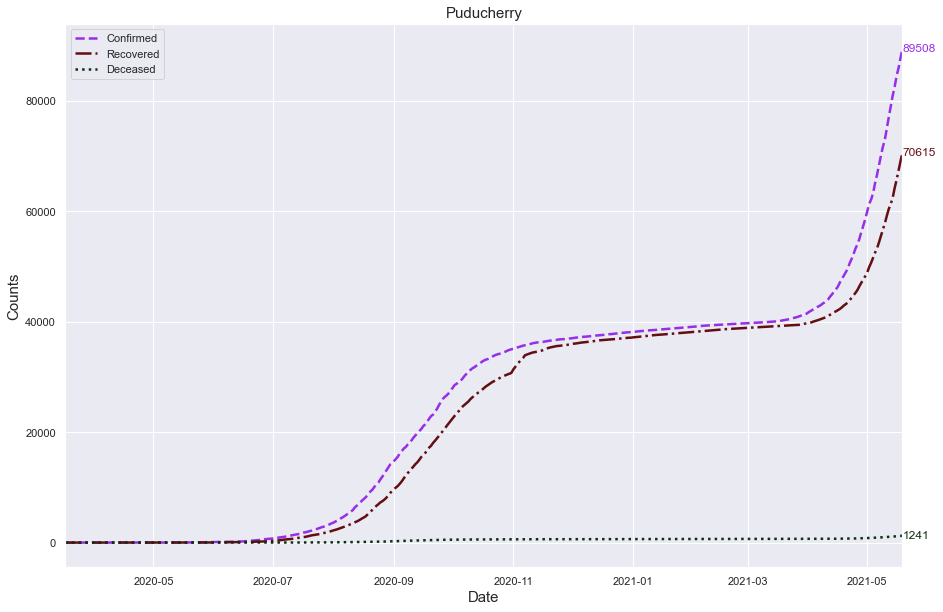

In [42]:
state_plot(st[26])

<b><i><h3 align='center' style='color:#33415c'>Punjab<a class='anchor' id='28'></a>

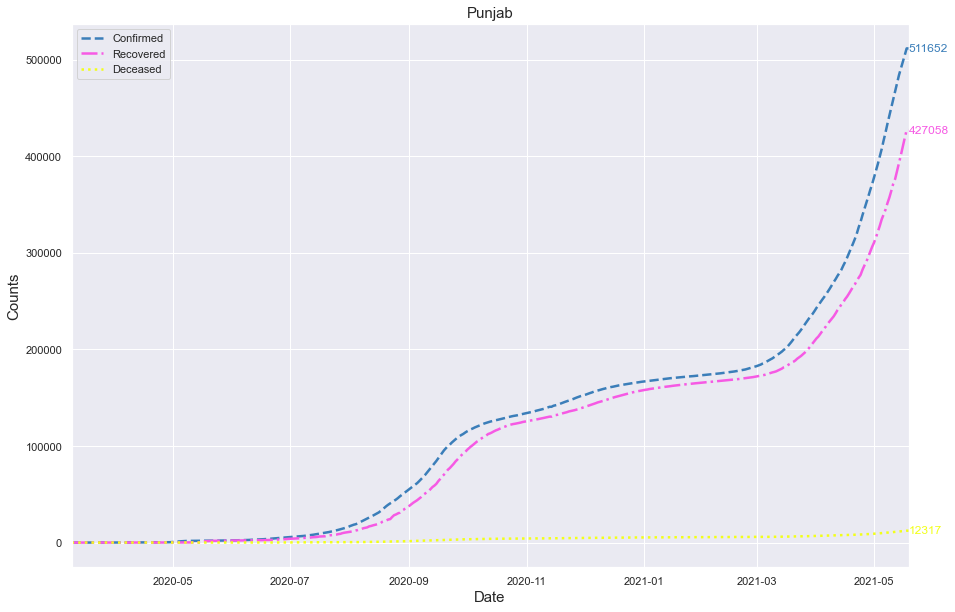

In [43]:
state_plot(st[27])

<b><i><h3 align='center' style='color:#33415c'>Rajasthan<a class='anchor' id='29'></a>

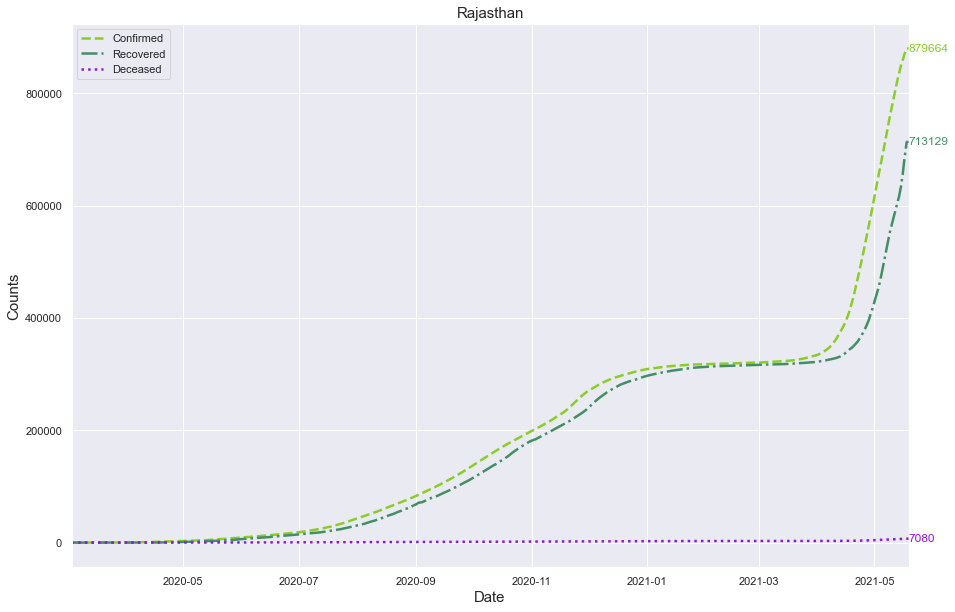

In [44]:
state_plot(st[28])

<b><i><h3 align='center' style='color:#33415c'>Sikkim<a class='anchor' id='30'></a>

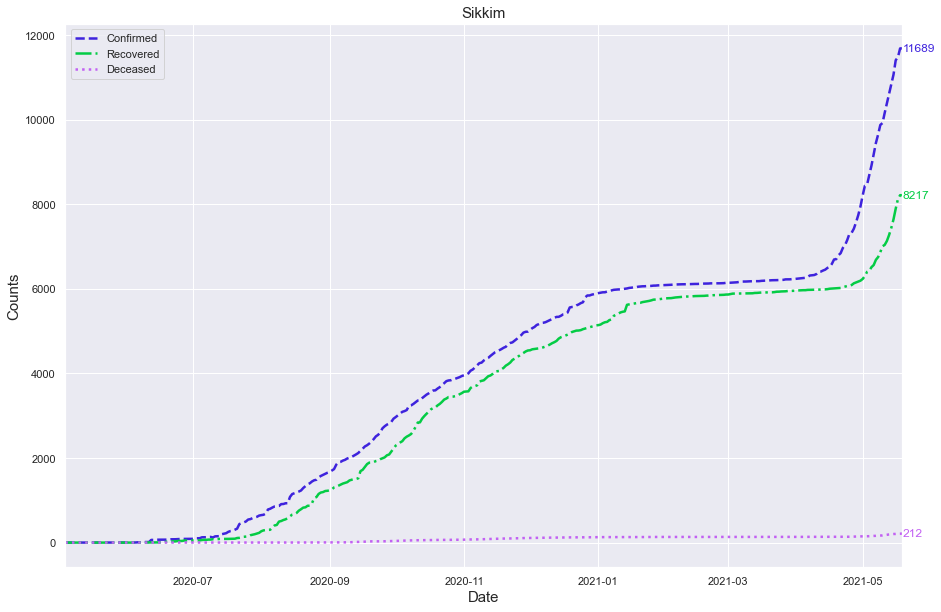

In [45]:
state_plot(st[29])

<b><i><h3 align='center' style='color:#33415c'>Tamil Nadu<a class='anchor' id='31'></a>

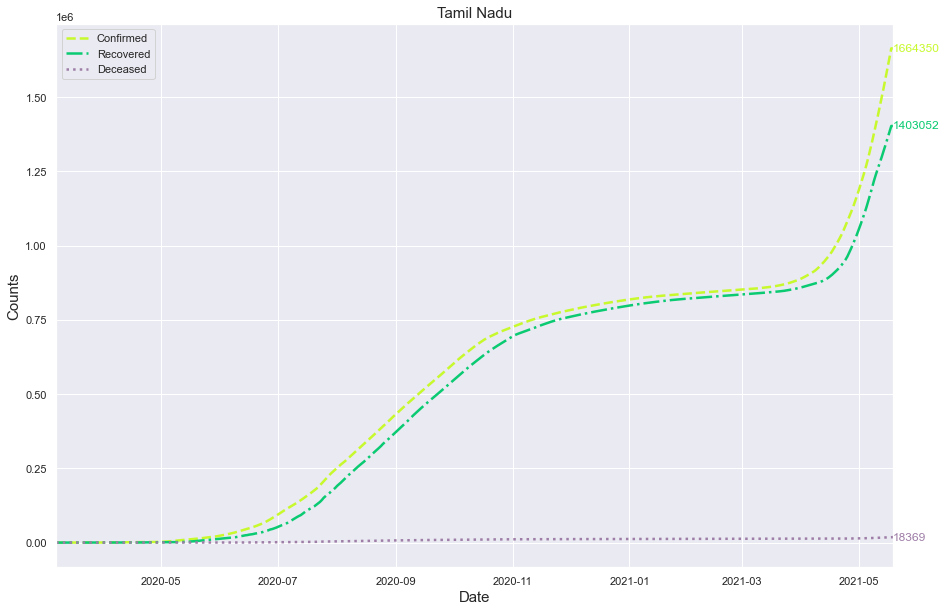

In [46]:
state_plot(st[30])

<b><i><h3 align='center' style='color:#33415c'>Telangana<a class='anchor' id='32'></a>

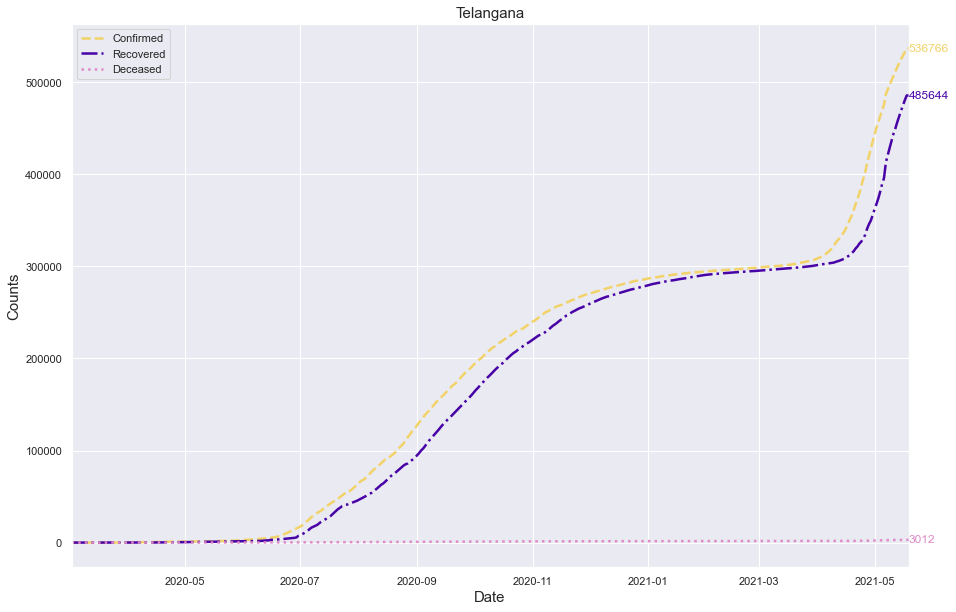

In [47]:
state_plot(st[31])

<b><i><h3 align='center' style='color:#33415c'>Tripura<a class='anchor' id='33'></a>

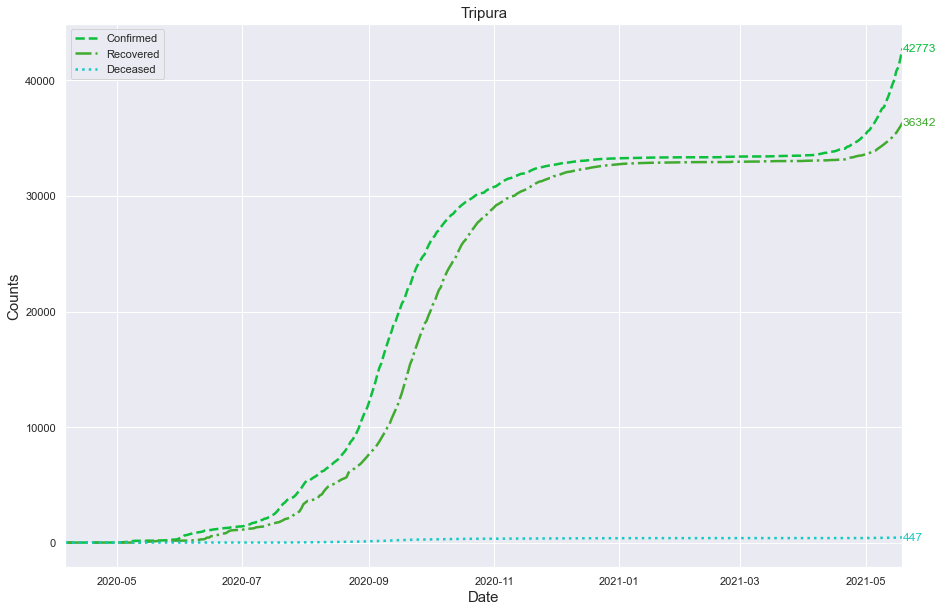

In [48]:
state_plot(st[32])

<b><i><h3 align='center' style='color:#33415c'>Uttar Pradesh<a class='anchor' id='34'></a>

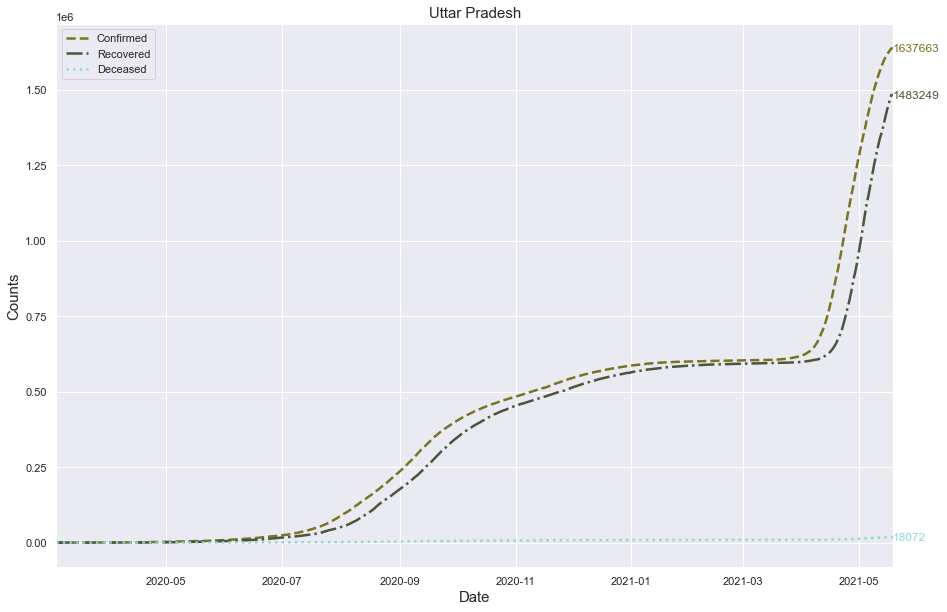

In [49]:
state_plot(st[33])

<b><i><h3 align='center' style='color:#33415c'>Uttarakhand<a class='anchor' id='35'></a>

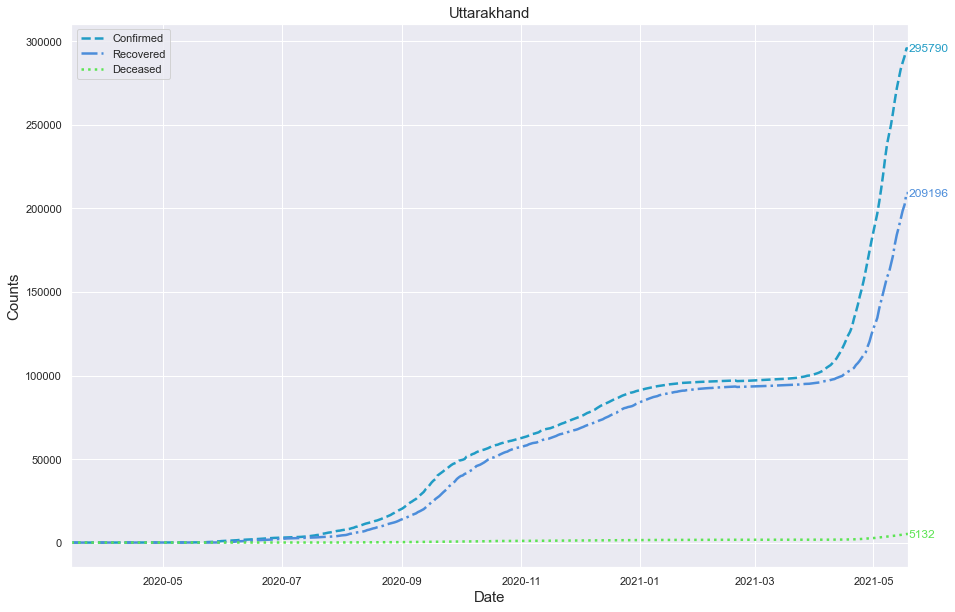

In [50]:
state_plot(st[34])

<b><i><h3 align='center' style='color:#33415c'>West Bengal<a class='anchor' id='36'></a>

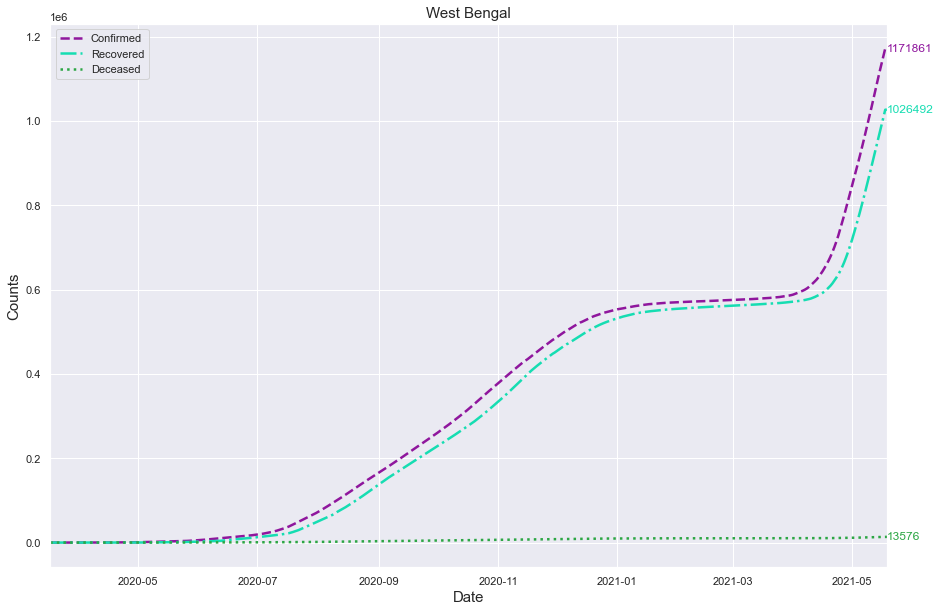

In [51]:
state_plot(st[35])

<h2><center style='color:#7D7CF9'>Cumulative Cases of each State<a class='anchor' id='k'></a>

In [52]:
for sta in st:
    a = state[state['State'] == sta]
    print('----------------------------------Cases in ' + a['State'].iloc[0] + '-------------------------------')
    print('Confirmed cases in {} as of {} are {}'.format(a['State'].iloc[0], a['Date'].iloc[-1], a['Confirmed'].iloc[-1]))
    print('')
    print('Recovered cases in {} as of {} are {}'.format(a['State'].iloc[0], a['Date'].iloc[-1], a['Recovered'].iloc[-1]))
    print('')
    print('Deceased cases in {} as of {} are {}'.format(a['State'].iloc[0], a['Date'].iloc[-1], a['Deceased'].iloc[-1]))
    print('')
    print('Tested cases in {} as of {} are {}'.format(a['State'].iloc[0], a['Date'].iloc[-1], a['Tested'].iloc[-1]))
    print('')

----------------------------------Cases in Andaman and Nicobar Islands-------------------------------
Confirmed cases in Andaman and Nicobar Islands as of 2021-05-19 are 6674

Recovered cases in Andaman and Nicobar Islands as of 2021-05-19 are 6359

Deceased cases in Andaman and Nicobar Islands as of 2021-05-19 are 92

Tested cases in Andaman and Nicobar Islands as of 2021-05-19 are 380102

----------------------------------Cases in Andhra Pradesh-------------------------------
Confirmed cases in Andhra Pradesh as of 2021-05-19 are 1475372

Recovered cases in Andhra Pradesh as of 2021-05-19 are 1254291

Deceased cases in Andhra Pradesh as of 2021-05-19 are 9580

Tested cases in Andhra Pradesh as of 2021-05-19 are 18140307

----------------------------------Cases in Arunachal Pradesh-------------------------------
Confirmed cases in Arunachal Pradesh as of 2021-05-19 are 22462

Recovered cases in Arunachal Pradesh as of 2021-05-19 are 19977

Deceased cases in Arunachal Pradesh as of 202

[TOP](#a)